In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Make graphs look nice
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
df1 = pd.read_csv("../../../Resources/Featured_Files/YFINANCE/IVV_1d_features.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1507 non-null   object 
 1   Ticker                   1507 non-null   object 
 2   Open                     1507 non-null   float64
 3   High                     1507 non-null   float64
 4   Low                      1507 non-null   float64
 5   Close                    1507 non-null   float64
 6   Volume                   1507 non-null   int64  
 7   Dividends                1507 non-null   float64
 8   Stock Splits             1507 non-null   float64
 9   Capital Gains            1507 non-null   float64
 10  Price_Movement           1507 non-null   float64
 11  Price_Movement_Pct       1507 non-null   float64
 12  Year                     1507 non-null   int64  
 13  Month                    1507 non-null   int64  
 14  Day                     

In [4]:
df1.shape, df1.head()

((1507, 32),
          Date Ticker        Open        High         Low       Close   Volume  \
 0  2020-01-02    IVV  296.816809  298.040680  295.876072  298.040680  4070500   
 1  2020-01-03    IVV  294.579127  296.889873  294.560870  295.748199  4290400   
 2  2020-01-06    IVV  293.994539  296.962889  293.894058  296.917206  4212000   
 3  2020-01-07    IVV  296.341758  296.807570  295.601956  296.104309  3632500   
 4  2020-01-08    IVV  296.268720  298.853455  296.022100  297.611328  3912100   
 
    Dividends  Stock Splits  Capital Gains  ...  Close_lag14  Close_lag21  \
 0        0.0           0.0            0.0  ...          0.0          0.0   
 1        0.0           0.0            0.0  ...          0.0          0.0   
 2        0.0           0.0            0.0  ...          0.0          0.0   
 3        0.0           0.0            0.0  ...          0.0          0.0   
 4        0.0           0.0            0.0  ...          0.0          0.0   
 
    Close_lag28  Close_lag365

In [5]:
df2 = pd.read_csv(r"../../../Resources/Raw_Files/FRED/fred_macro_data.csv")

In [6]:
df2.info(), df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       2190 non-null   object 
 1   GDP                                        2190 non-null   float64
 2   CPI_Inflation                              2190 non-null   float64
 3   Average_price_of_eggs                      2190 non-null   float64
 4   Average_price_of_electricity               2190 non-null   float64
 5   Leading_Index_for_US                       2190 non-null   float64
 6   NBER_Recession_Indicator                   2190 non-null   float64
 7   Producer_Price_Index                       2190 non-null   float64
 8   5-Year_Breakeven_Inflation                 2190 non-null   float64
 9   Natural_Rate__of_Unemployment_(est.)       2190 non-null   float64
 10  Civilian_Labor_Force_Par

(None,
          Date        GDP  CPI_Inflation  Average_price_of_eggs  \
 0  2020-01-03  21751.238        259.127                  1.461   
 1  2020-01-04  21751.238        259.127                  1.461   
 2  2020-01-05  21751.238        259.127                  1.461   
 3  2020-01-06  21751.238        259.127                  1.461   
 4  2020-01-07  21751.238        259.127                  1.461   
 
    Average_price_of_electricity  Leading_Index_for_US  \
 0                         0.134                  1.57   
 1                         0.134                  1.57   
 2                         0.134                  1.57   
 3                         0.134                  1.57   
 4                         0.134                  1.57   
 
    NBER_Recession_Indicator  Producer_Price_Index  5-Year_Breakeven_Inflation  \
 0                       0.0                 199.3                        1.85   
 1                       0.0                 199.3                        1

In [7]:
merged = df2.merge(df1, on="Date", how="inner")  

In [8]:
merged.shape, merged.head()

((1506, 78),
          Date        GDP  CPI_Inflation  Average_price_of_eggs  \
 0  2020-01-03  21751.238        259.127                  1.461   
 1  2020-01-06  21751.238        259.127                  1.461   
 2  2020-01-07  21751.238        259.127                  1.461   
 3  2020-01-08  21751.238        259.127                  1.461   
 4  2020-01-09  21751.238        259.127                  1.461   
 
    Average_price_of_electricity  Leading_Index_for_US  \
 0                         0.134                  1.57   
 1                         0.134                  1.57   
 2                         0.134                  1.57   
 3                         0.134                  1.57   
 4                         0.134                  1.57   
 
    NBER_Recession_Indicator  Producer_Price_Index  5-Year_Breakeven_Inflation  \
 0                       0.0                 199.3                        1.85   
 1                       0.0                 199.3                   

In [9]:
def movement_category(movement):
    if movement == "high":
        return 1
    elif movement == "same": 
        return 0
    else:
        return -1

In [10]:
merged['Price_Movement_Category'] = merged['Price_Movement_Category'].apply(movement_category)

In [11]:
merged.shape, merged.head()

((1506, 78),
          Date        GDP  CPI_Inflation  Average_price_of_eggs  \
 0  2020-01-03  21751.238        259.127                  1.461   
 1  2020-01-06  21751.238        259.127                  1.461   
 2  2020-01-07  21751.238        259.127                  1.461   
 3  2020-01-08  21751.238        259.127                  1.461   
 4  2020-01-09  21751.238        259.127                  1.461   
 
    Average_price_of_electricity  Leading_Index_for_US  \
 0                         0.134                  1.57   
 1                         0.134                  1.57   
 2                         0.134                  1.57   
 3                         0.134                  1.57   
 4                         0.134                  1.57   
 
    NBER_Recession_Indicator  Producer_Price_Index  5-Year_Breakeven_Inflation  \
 0                       0.0                 199.3                        1.85   
 1                       0.0                 199.3                   

In [12]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 78 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       1506 non-null   object 
 1   GDP                                        1506 non-null   float64
 2   CPI_Inflation                              1506 non-null   float64
 3   Average_price_of_eggs                      1506 non-null   float64
 4   Average_price_of_electricity               1506 non-null   float64
 5   Leading_Index_for_US                       1506 non-null   float64
 6   NBER_Recession_Indicator                   1506 non-null   float64
 7   Producer_Price_Index                       1506 non-null   float64
 8   5-Year_Breakeven_Inflation                 1506 non-null   float64
 9   Natural_Rate__of_Unemployment_(est.)       1506 non-null   float64
 10  Civilian_Labor_Force_Par

In [13]:
drop_list = ['Date','Ticker','Open', 'High', 'Low']

In [14]:
merged = merged.drop(drop_list,axis=1)

In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   GDP                                        1506 non-null   float64
 1   CPI_Inflation                              1506 non-null   float64
 2   Average_price_of_eggs                      1506 non-null   float64
 3   Average_price_of_electricity               1506 non-null   float64
 4   Leading_Index_for_US                       1506 non-null   float64
 5   NBER_Recession_Indicator                   1506 non-null   float64
 6   Producer_Price_Index                       1506 non-null   float64
 7   5-Year_Breakeven_Inflation                 1506 non-null   float64
 8   Natural_Rate__of_Unemployment_(est.)       1506 non-null   float64
 9   Civilian_Labor_Force_Participation         1506 non-null   float64
 10  BBB_Corporate_Spread    

In [16]:
merged = merged.fillna(0)

In [17]:
df3 = merged.copy()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df3.drop(['Close'],axis=1),
                                    df3['Close'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:", X_test.shape, y_test.shape)

* Train set: (1204, 72) (1204,) 
* Test set: (302, 72) (302,)


In [19]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor

def pipeline_adaboost_reg():
  pipeline = Pipeline([
      ( "feat_scaling",StandardScaler() ),
      ( "feat_selection",SelectFromModel(RandomForestRegressor(random_state=101)) ),
      ( "model", RandomForestRegressor(random_state=101)),

    ])

  return pipeline

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html  # documentation is here
param_grid = {"model__n_estimators":[10,20],
              }

param_grid

{'model__n_estimators': [10, 20]}

In [21]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipeline_adaboost_reg(),
                    param_grid=param_grid,
                    cv=2,
                    n_jobs=-2,
                    verbose=3,  # for learning, we set 3 to print the score from every cross-validation
                    scoring='r2')


grid.fit(X_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('feat_scaling', StandardScaler()),
                                       ('feat_selection',
                                        SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                                       ('model',
                                        RandomForestRegressor(random_state=101))]),
             n_jobs=-2, param_grid={'model__n_estimators': [10, 20]},
             scoring='r2', verbose=3)

In [22]:
grid.cv_results_

{'mean_fit_time': array([1.81146002, 1.90538752]),
 'std_fit_time': array([0.01952624, 0.03377998]),
 'mean_score_time': array([0.03261817, 0.02673531]),
 'std_score_time': array([0.00234139, 0.00418663]),
 'param_model__n_estimators': masked_array(data=[10, 20],
              mask=[False, False],
        fill_value=999999),
 'params': [{'model__n_estimators': 10}, {'model__n_estimators': 20}],
 'split0_test_score': array([0.99736972, 0.99756978]),
 'split1_test_score': array([0.99730157, 0.99730845]),
 'mean_test_score': array([0.99733565, 0.99743911]),
 'std_test_score': array([3.40728413e-05, 1.30661647e-04]),
 'rank_test_score': array([2, 1], dtype=int32)}

In [23]:
(pd.DataFrame(grid.cv_results_)
.sort_values(by='mean_test_score',ascending=False)
.filter(['params','mean_test_score'])
.values
 )

array([[{'model__n_estimators': 20}, 0.9974391133920868],
       [{'model__n_estimators': 10}, 0.9973356468816735]], dtype=object)

In [24]:
grid.best_params_

{'model__n_estimators': 20}

In [25]:
pipeline = grid.best_estimator_
pipeline

Pipeline(steps=[('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model',
                 RandomForestRegressor(n_estimators=20, random_state=101))])

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
import numpy as np

def regression_performance(X_train, y_train, X_test, y_test,pipeline):
	print("Model Evaluation \n")
	print("* Train Set")
	regression_evaluation(X_train,y_train,pipeline)
	print("* Test Set")
	regression_evaluation(X_test,y_test,pipeline)



def regression_evaluation(X,y,pipeline):
  prediction = pipeline.predict(X)
  print('R2 Score:', round(r2_score(y, prediction), 3))
  print('Mean Absolute Error:', round(mean_absolute_error(y, prediction), 3))
  print('Mean Squared Error:', round(mean_squared_error(y, prediction), 3))
  print('Root Mean Squared Error:',
          round(np.sqrt(mean_squared_error(y, prediction)), 3))
  print("\n")

  

def regression_evaluation_plots(X_train, y_train, X_test, y_test,pipeline, alpha_scatter=0.5):
  pred_train = pipeline.predict(X_train)
  pred_test = pipeline.predict(X_test)


  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
  sns.scatterplot(x=y_train , y=pred_train, alpha=alpha_scatter, ax=axes[0])
  sns.lineplot(x=y_train , y=y_train, color='red', ax=axes[0])
  axes[0].set_xlabel("Actual")
  axes[0].set_ylabel("Predictions")
  axes[0].set_title("Train Set")

  sns.scatterplot(x=y_test , y=pred_test, alpha=alpha_scatter, ax=axes[1])
  sns.lineplot(x=y_test , y=y_test, color='red', ax=axes[1])
  axes[1].set_xlabel("Actual")
  axes[1].set_ylabel("Predictions")
  axes[1].set_title("Test Set")
  plt.show()

Model Evaluation 

* Train Set
R2 Score: 1.0
Mean Absolute Error: 1.47
Mean Squared Error: 4.407
Root Mean Squared Error: 2.099


* Test Set
R2 Score: 0.997
Mean Absolute Error: 4.244
Mean Squared Error: 40.673
Root Mean Squared Error: 6.378




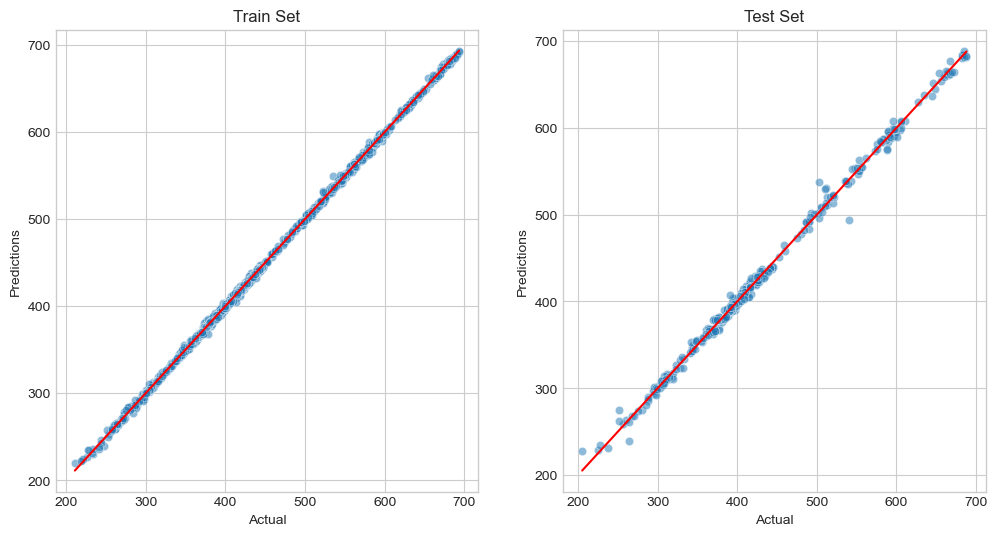

In [27]:
regression_performance(X_train, y_train, X_test, y_test,pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, 
                            pipeline, alpha_scatter=0.5)

In [28]:
print(f"Training on {len(X_train)} IVV ETFs")
print(f"Testing on {len(X_test)} IVV ETFs")

Training on 1204 IVV ETFs
Testing on 302 IVV ETFs


In [29]:
# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [30]:
y_pred

array([514.45244066, 491.11215927, 422.84942006, 396.877675  ,
       262.33562476, 424.97485088, 345.83335101, 547.07974341,
       409.89024186, 342.80641223, 647.54585726, 333.8352834 ,
       423.14574607, 394.06006788, 443.86449567, 359.49446886,
       259.83918196, 292.39983496, 608.76536437, 403.65790238,
       684.63795836, 504.72135939, 661.80726636, 434.12190246,
       429.83445986, 604.92966987, 291.99055443, 311.9283511 ,
       326.08134109, 433.60978264, 363.14859175, 403.2497651 ,
       330.2029998 , 669.3718782 , 277.52149316, 532.8275721 ,
       304.32414553, 590.45769475, 387.5975811 , 374.55362551,
       243.12447532, 297.20863381, 556.21563434, 412.94928051,
       343.28820405, 400.22557906, 379.70364945, 375.81284779,
       594.49473005, 425.81127024, 591.8738775 , 395.90664438,
       398.09101712, 374.65742391, 583.45106795, 414.14340231,
       597.17952443, 385.59124786, 661.05121883, 403.51789488,
       486.87899394, 268.67420722, 369.19594315, 292.10

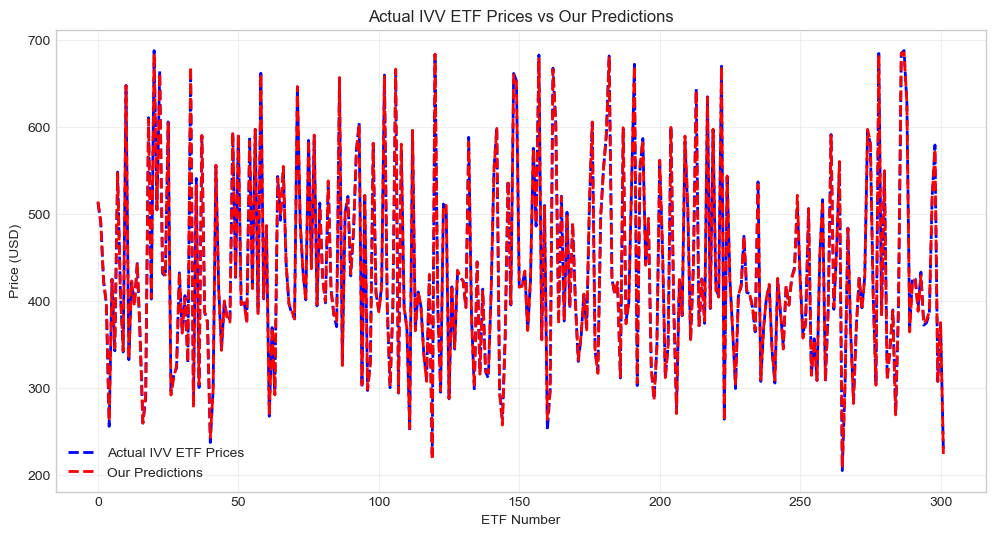

In [31]:
# Simple line plot - Actual vs Predicted
plt.figure(figsize=(12, 6))

# Plot both lines
x_axis = range(len(y_test))
plt.plot(x_axis, y_test.values, 'b--', label='Actual IVV ETF Prices', linewidth=2)
plt.plot(x_axis, y_pred, 'r--', label='Our Predictions', linewidth=2)

plt.xlabel('ETF Number')
plt.ylabel('Price (USD)')
plt.title('Actual IVV ETF Prices vs Our Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [32]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("REGRESSION METRICS EXPLAINED:")
print("=" * 50)
print()
print("Mean Absolute Error (MAE)")
print(f"   Your MAE: ${mae:,.0f}")
print("   What it means: On average, our predictions are off by this much")
print("   Think of it as: The typical mistake we make")
print("   Goal: Lower is better!")
print()
print("R² Score (R-squared)")
print(f"   Your R²: {r2:.1%}")
print("   What it means: How much of the price variation we can explain")
print("   Think of it as: Our model's grade out of 100%")
print("   Goal: Higher is better (100% = perfect, 0% = terrible)")
print()
print("Quick Guide:")
print("   R² > 80% = Great!")
print("   R² 70-80% = Good")
print("   R² 60-70% = OK")
print("   R² < 60% = Needs improvement")

REGRESSION METRICS EXPLAINED:

Mean Absolute Error (MAE)
   Your MAE: $2
   What it means: On average, our predictions are off by this much
   Think of it as: The typical mistake we make
   Goal: Lower is better!

R² Score (R-squared)
   Your R²: 99.9%
   What it means: How much of the price variation we can explain
   Think of it as: Our model's grade out of 100%
   Goal: Higher is better (100% = perfect, 0% = terrible)

Quick Guide:
   R² > 80% = Great!
   R² 70-80% = Good
   R² 60-70% = OK
   R² < 60% = Needs improvement


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

def pipeline_adaboost_reg():
    pipeline = Pipeline([
        ("feat_scaling", StandardScaler()),
        ("feat_selection", SelectFromModel(RandomForestRegressor(random_state=101))),
        ("model", RandomForestRegressor(random_state=101)),
    ])
    return pipeline

In [34]:
pipe = pipeline_adaboost_reg()
pipe.fit(X_train, y_train)

# 1. Get the fitted selector and its mask
selector = pipe.named_steps["feat_selection"]
support_mask = selector.get_support()              # boolean array
selected_features = X_train.columns[support_mask]  # names of selected features

print("Selected features:", list(selected_features))

Selected features: ['CPI_Inflation', 'Personal_Consumption_Expenditures', 'Core_CPI_(ex_Food/Energy)', 'Nonfarm_Payrolls', 'Close_lag1', 'Close_lag3', 'Close_lag5', 'Close_lag7', 'Close_lag28']


In [35]:
pipe = pipeline_adaboost_reg()
pipe.fit(X_train, y_train)

Pipeline(steps=[('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model', RandomForestRegressor(random_state=101))])

In [36]:
selector = pipe.named_steps["feat_selection"]
support_mask = selector.get_support()              # boolean array
selected_features = X_train.columns[support_mask]  # names of selected features

print("Selected features:", list(selected_features))

Selected features: ['CPI_Inflation', 'Personal_Consumption_Expenditures', 'Core_CPI_(ex_Food/Energy)', 'Nonfarm_Payrolls', 'Close_lag1', 'Close_lag3', 'Close_lag5', 'Close_lag7', 'Close_lag28']


In [37]:
import numpy as np
import pandas as pd

rf = selector.estimator_                          # the fitted RandomForestRegressor
importances = rf.feature_importances_             # array aligned with original columns

feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances,
})

# Sort and take top 15
feat_imp = feat_imp.sort_values("importance", ascending=False)
top15 = feat_imp.head(15).copy()

# Percentage of total importance
total_imp = feat_imp["importance"].sum()
top15["importance_pct"] = 100 * top15["importance"] / total_imp

print(top15)

                                      feature  importance  importance_pct
58                                 Close_lag1    0.415181       41.518088
59                                 Close_lag3    0.133836       13.383627
61                                 Close_lag7    0.118794       11.879418
60                                 Close_lag5    0.105740       10.574033
12          Personal_Consumption_Expenditures    0.067039        6.703917
15                  Core_CPI_(ex_Food/Energy)    0.052093        5.209266
1                               CPI_Inflation    0.037154        3.715401
64                                Close_lag28    0.033460        3.345966
20                           Nonfarm_Payrolls    0.022186        2.218558
62                                Close_lag14    0.004503        0.450330
63                                Close_lag21    0.002783        0.278326
16                10-Year_Breakeven_Inflation    0.002465        0.246504
38                CBOE_Volatility_Inde

In [38]:
top15_names = set(top15["feature"])
selected_set = set(selected_features)

intersection = top15_names & selected_set
match_pct = 100 * len(intersection) / len(top15_names)

print("Overlap features:", intersection)
print("Match percentage:", match_pct)

Overlap features: {'Close_lag28', 'Close_lag3', 'Core_CPI_(ex_Food/Energy)', 'CPI_Inflation', 'Personal_Consumption_Expenditures', 'Close_lag5', 'Close_lag1', 'Close_lag7', 'Nonfarm_Payrolls'}
Match percentage: 60.0
